In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp

In [2]:
dados_alunos = []
dados_cursos = []
qtd_alunos_def = []
qtd_cursos_ass = []
anos = [str(i) for i in range(2011,2019)]

In [3]:
# Os dados utilizados para as deficiências são os contidos nas colunas IN_DEF_SURDEZ, IN_DEF_SURDOCEGUEIRA, 
# IN_DEF_BAIXA_VISAO, IN_DEF_CEGUEIRA, onde os alunos declaram quais das respectivas deficiências portam e os dados
# utilizados para tecnologias assistivas para o aprendizado são os contidos nas colunas IN_MATERIAL_DIGITAL e 
# IN_RECURSOS_INFORMATICA. Nestas colunas encontra-se especificado os cursos em IES públicas que disponibilizam 
# material digital acessível e recursos de informática acessíveis.


In [4]:
for n in anos:
	try:
		dados_alunos = pd.read_csv('DM_ALUNO_' + n + '.CSV', encoding = 'iso-8859-1', usecols = ['CO_CATEGORIA_ADMINISTRATIVA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA'], sep = '|')
		dados_cursos = pd.read_csv('DM_CURSO_' + n + '.CSV', encoding = 'iso-8859-1', usecols = ['CO_CATEGORIA_ADMINISTRATIVA', 'IN_MATERIAL_DIGITAL', 'IN_RECURSOS_INFORMATICA'], sep = '|')
		qtd_alunos_def.append(dados_alunos.query('(CO_CATEGORIA_ADMINISTRATIVA == 1) and ((IN_DEF_SURDEZ == 1) or (IN_DEF_SURDOCEGUEIRA == 1) or (IN_DEF_BAIXA_VISAO == 1) or (IN_DEF_CEGUEIRA == 1))')['CO_CATEGORIA_ADMINISTRATIVA'].count())
		qtd_cursos_ass.append(dados_cursos.query('(CO_CATEGORIA_ADMINISTRATIVA == 1) and ((IN_MATERIAL_DIGITAL == 1) or (IN_RECURSOS_INFORMATICA == 1))')['CO_CATEGORIA_ADMINISTRATIVA'].count())
	except:
		dados_alunos = pd.read_csv('DM_ALUNO_' + n + '.CSV', encoding = 'iso-8859-1', usecols = ['TP_CATEGORIA_ADMINISTRATIVA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA'], sep = '|')
		dados_cursos = pd.read_csv('DM_CURSO_' + n + '.CSV', encoding = 'iso-8859-1', usecols = ['TP_CATEGORIA_ADMINISTRATIVA', 'IN_MATERIAL_DIGITAL', 'IN_RECURSOS_INFORMATICA'], sep = '|')
		qtd_alunos_def.append(dados_alunos.query('(TP_CATEGORIA_ADMINISTRATIVA == 1) and ((IN_DEFICIENCIA_SURDEZ == 1) or (IN_DEFICIENCIA_SURDOCEGUEIRA == 1) or (IN_DEFICIENCIA_BAIXA_VISAO == 1) or (IN_DEFICIENCIA_CEGUEIRA == 1))')['TP_CATEGORIA_ADMINISTRATIVA'].count())
		qtd_cursos_ass.append(dados_cursos.query('(TP_CATEGORIA_ADMINISTRATIVA == 1) and ((IN_MATERIAL_DIGITAL == 1) or (IN_RECURSOS_INFORMATICA == 1))')['TP_CATEGORIA_ADMINISTRATIVA'].count())


In [5]:
labels = [str(i) for i in range(2011, 2019)]
x = np.arange(len(labels))

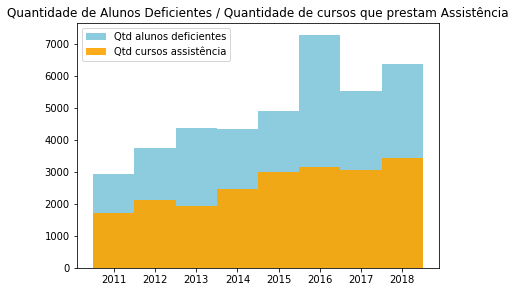

In [6]:
fig, ax = mlp.subplots(figsize=(6.5,4.5))
barras1 = ax.bar(x, qtd_alunos_def, width=1, label='Qtd alunos deficientes', color='#81c7db', alpha=0.9)
barras2 = ax.bar(x, qtd_cursos_ass, width=1, label='Qtd cursos assistência', color='#fca400', alpha=0.9)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Quantidade de Alunos Deficientes / Quantidade de cursos que prestam Assistência')
ax.legend(loc=0) 

In [10]:
#DataFrame para melhor visualização dos dados:

In [11]:
DF = pd.DataFrame({'Qtd alunos deficiência': [qtd_alunos_def[0], qtd_alunos_def[1], qtd_alunos_def[2], qtd_alunos_def[3], qtd_alunos_def[4], qtd_alunos_def[5], qtd_alunos_def[6], qtd_alunos_def[7]], 'Qtd cursos assistência': [qtd_cursos_ass[0], qtd_cursos_ass[1], qtd_cursos_ass[2], qtd_cursos_ass[3], qtd_cursos_ass[4], qtd_cursos_ass[5], qtd_cursos_ass[6], qtd_cursos_ass[7]]}, index=[str(i) for i in range(2011,2019)])
print(DF)

      Qtd alunos deficiência  Qtd cursos assistência
2011                    2945                    1705
2012                    3744                    2123
2013                    4369                    1941
2014                    4333                    2474
2015                    4910                    3004
2016                    7299                    3155
2017                    5533                    3076
2018                    6400                    3454


In [12]:
#Outra opção de plotagem:

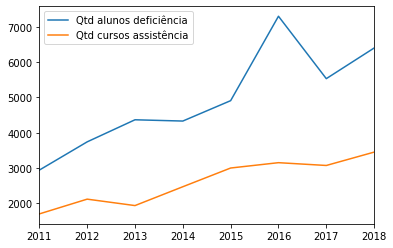

In [13]:
DF.plot.line()